In [1]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import matplotlib.transforms as transforms
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from skimage import metrics
from math import sqrt
import seaborn as sns
from math import pi
import numpy as np
import os
# %matplotlib widget

path = os.path.abspath("..")

In [4]:
ot = np.load(path+'/Step1_decomposition/tensor.npy',) # allow_pickle=True)

cp1  = np.load(path+'/Step1_decomposition/reconstructed_tensors/nonelastic_reconstruction/recon_cpd_tensor_1.npy',) # allow_pickle=True)
cp2  = np.load(path+'/Step1_decomposition/reconstructed_tensors/nonelastic_reconstruction/recon_cpd_tensor_2.npy',) # allow_pickle=True)
cp3  = np.load(path+'/Step1_decomposition/reconstructed_tensors/nonelastic_reconstruction/recon_cpd_tensor_3.npy',) # allow_pickle=True)
rmse_cpd_1 = np.load(path+'/Step1_decomposition/reconstructed_tensors/nonelastic_reconstruction/rmse_cpd_1.npy',)
rmse_cpd_2 = np.load(path+'/Step1_decomposition/reconstructed_tensors/nonelastic_reconstruction/rmse_cpd_2.npy',)
rmse_cpd_3 = np.load(path+'/Step1_decomposition/reconstructed_tensors/nonelastic_reconstruction/rmse_cpd_3.npy',)


tt1  = np.load(path+'/Step1_decomposition/reconstructed_tensors/nonelastic_reconstruction/recon_tuc_tensor_1.npy',) # allow_pickle=True)
tt2  = np.load(path+'/Step1_decomposition/reconstructed_tensors/nonelastic_reconstruction/recon_tuc_tensor_2.npy',) # allow_pickle=True)
tt3  = np.load(path+'/Step1_decomposition/reconstructed_tensors/nonelastic_reconstruction/recon_tuc_tensor_3.npy',) # allow_pickle=True)
rmse_ttd_1 = np.load(path+'/Step1_decomposition/reconstructed_tensors/nonelastic_reconstruction/rmse_ttd_1.npy',)
rmse_ttd_2 = np.load(path+'/Step1_decomposition/reconstructed_tensors/nonelastic_reconstruction/rmse_ttd_2.npy',)
rmse_ttd_3 = np.load(path+'/Step1_decomposition/reconstructed_tensors/nonelastic_reconstruction/rmse_ttd_3.npy',)


def scale_array(arr):
  scaled_arry = []
  for f in range(arr.shape[-1]):
    arr_min = np.min(arr[:,:,f])
    arr_max = np.max(arr[:,:,f])
    scaled_arry.append(((arr[:,:,f] - arr_min) / (arr_max - arr_min) * 255).astype(np.uint8))
  scaled_arry = np.array(scaled_arry).transpose(1,2,0)
  return scaled_arry

ot_scaled = scale_array(ot)
cp1_scaled = scale_array(cp1)
cp2_scaled = scale_array(cp2)
cp3_scaled = scale_array(cp3)
tt1_scaled = scale_array(tt1)
tt2_scaled = scale_array(tt2)
tt3_scaled = scale_array(tt3)

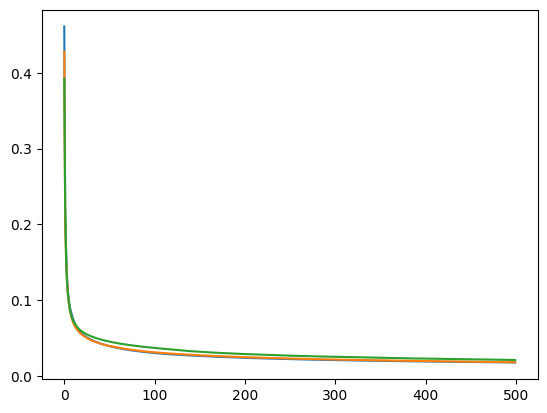

In [5]:
plt.plot(rmse_cpd_1)
plt.plot(rmse_cpd_2)
plt.plot(rmse_cpd_3)
plt.show()

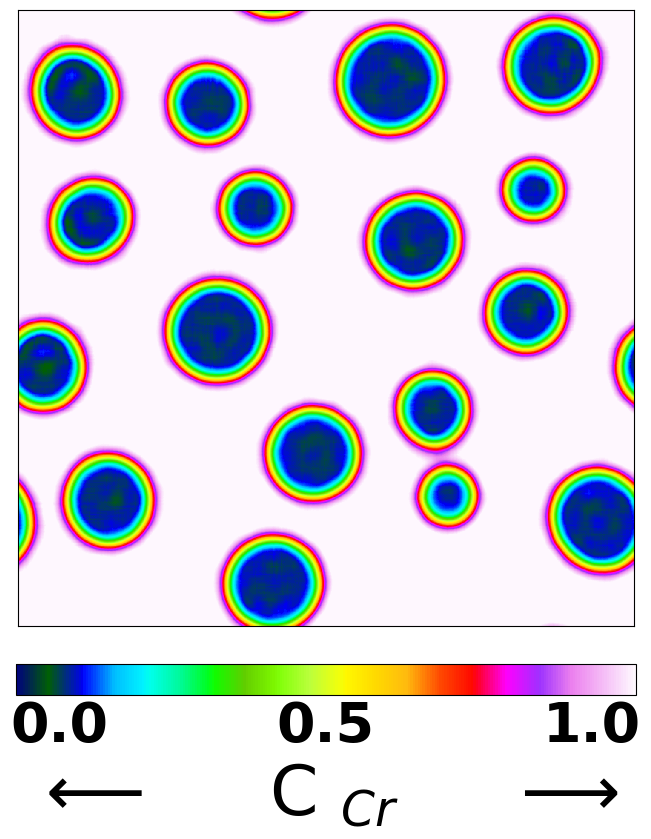

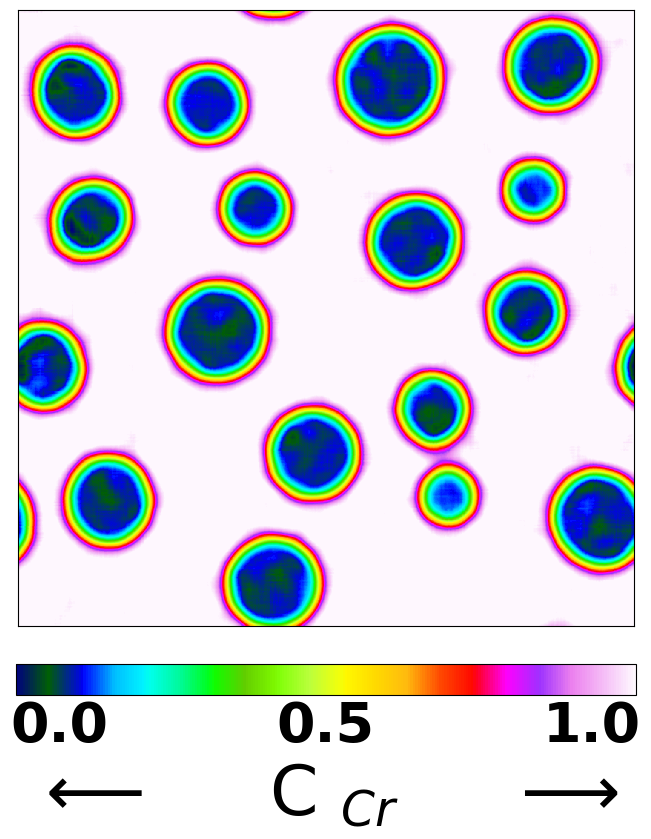

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize=[8, 10]) #figsize=[8, 10])
hmap1 = ax1.imshow(tt1[:,:,-1], vmin = 0.0, vmax = 1.0,   cmap='gist_ncar')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, orientation='horizontal', ax=[ax1], pad=0.05)
cbar.set_ticks([0.07, 0.5, 0.93],labels=['0.0', '0.5', '1.0'], weight='bold',) 
cbar.ax.tick_params(labelsize=40,length=0) 
cbar.set_label('$\longleftarrow$     C $_{Cr}$     $\longrightarrow$',  labelpad=5, fontsize=50, rotation=00)
plt.savefig('figures/recon_cpd220.png', transparent=True)

plt.show()

fig, ax1 = plt.subplots(1, 1, figsize=[8, 10]) #figsize=[8, 10])
hmap1 = ax1.imshow(cp1[:,:,-1], vmin = 0.0, vmax = 1.0,  cmap='gist_ncar')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, orientation='horizontal', ax=[ax1], pad=0.05)
cbar.set_ticks([0.07, 0.5, 0.93],labels=['0.0', '0.5', '1.0'], weight='bold',) 
cbar.ax.tick_params(labelsize=40,length=0) 
cbar.set_label('$\longleftarrow$     C $_{Cr}$     $\longrightarrow$',  labelpad=5, fontsize=50, rotation=00)
plt.savefig('figures/recon_tt220.png', transparent=True)


plt.show()

## Sparse and Original Tensors

In [7]:
def random_tensor_generator(p, shape):
  np.random.seed(1)
  random_tensor = np.zeros(shape)
  num_ones_per_subarray = int(p * random_tensor.size // (random_tensor.shape[0] * random_tensor.shape[1]))
  for i in range(random_tensor.shape[0]):
      for j in range(random_tensor.shape[1]):
          positions = np.random.choice(random_tensor.shape[2], num_ones_per_subarray, replace=False)
          random_tensor[i, j, positions] = 1
        
  return random_tensor

p1 = 0.10
p2 = 0.15
p3 = 0.20

sparse_tensor_1 = ot * random_tensor_generator(p1, ot.shape)     # x_dim, y_dim, t_dim = ot.shape
sparse_tensor_2 = ot * random_tensor_generator(p2, ot.shape)
sparse_tensor_3 = ot * random_tensor_generator(p3, ot.shape)

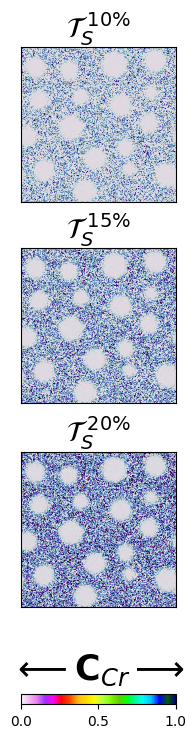

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[2, 9], gridspec_kw={'height_ratios': [0.55, 0.55, 1]})
t = [219]
# plt.subplots_adjust(hspace=0)  
hmap4 = plt.imshow(ot[:,:,t[0]], vmin = 0.0, vmax = 1.0, cmap = 'gist_ncar_r')

hmap1 = ax1.imshow(sparse_tensor_1[:,:,t[0]], vmin = 0.0, vmax = 1.0, cmap = 'twilight')
hmap2 = ax2.imshow(sparse_tensor_2[:,:,t[0]], vmin = 0.0, vmax = 1.0, cmap = 'twilight')
hmap3 = ax3.imshow(sparse_tensor_3[:,:,t[0]], vmin = 0.0, vmax = 1.0, cmap = 'twilight')

ax1.tick_params(axis='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax2.tick_params(axis='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax3.tick_params(axis='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

cbar = fig.colorbar(hmap4, ax=[ax3], orientation='horizontal', aspect=15, pad=0.3)
cbar.set_ticks([0, 0.5, 1],labels=['0.0', '0.5', '1.0']) 
cbar.ax.tick_params(labelsize=10) 
cbar.set_label('$\longleftarrow$C$_{Cr}$$\longrightarrow$',  labelpad=-55, fontsize=25, rotation=00, weight='bold')

ax1.set_title('$\mathcal{T}^{\ 10\%}_{S}$', fontsize=20, weight='bold', color ='k')
ax2.set_title('$\mathcal{T}^{\ 15\%}_{S}$', fontsize=20, weight='bold', color ='k')
ax3.set_title('$\mathcal{T}^{\ 20\%}_{S}$', fontsize=20, weight='bold', color ='k')

plt.savefig('figures/sparse_fig_decom.png', transparent=True)
plt.show()

## Blobs

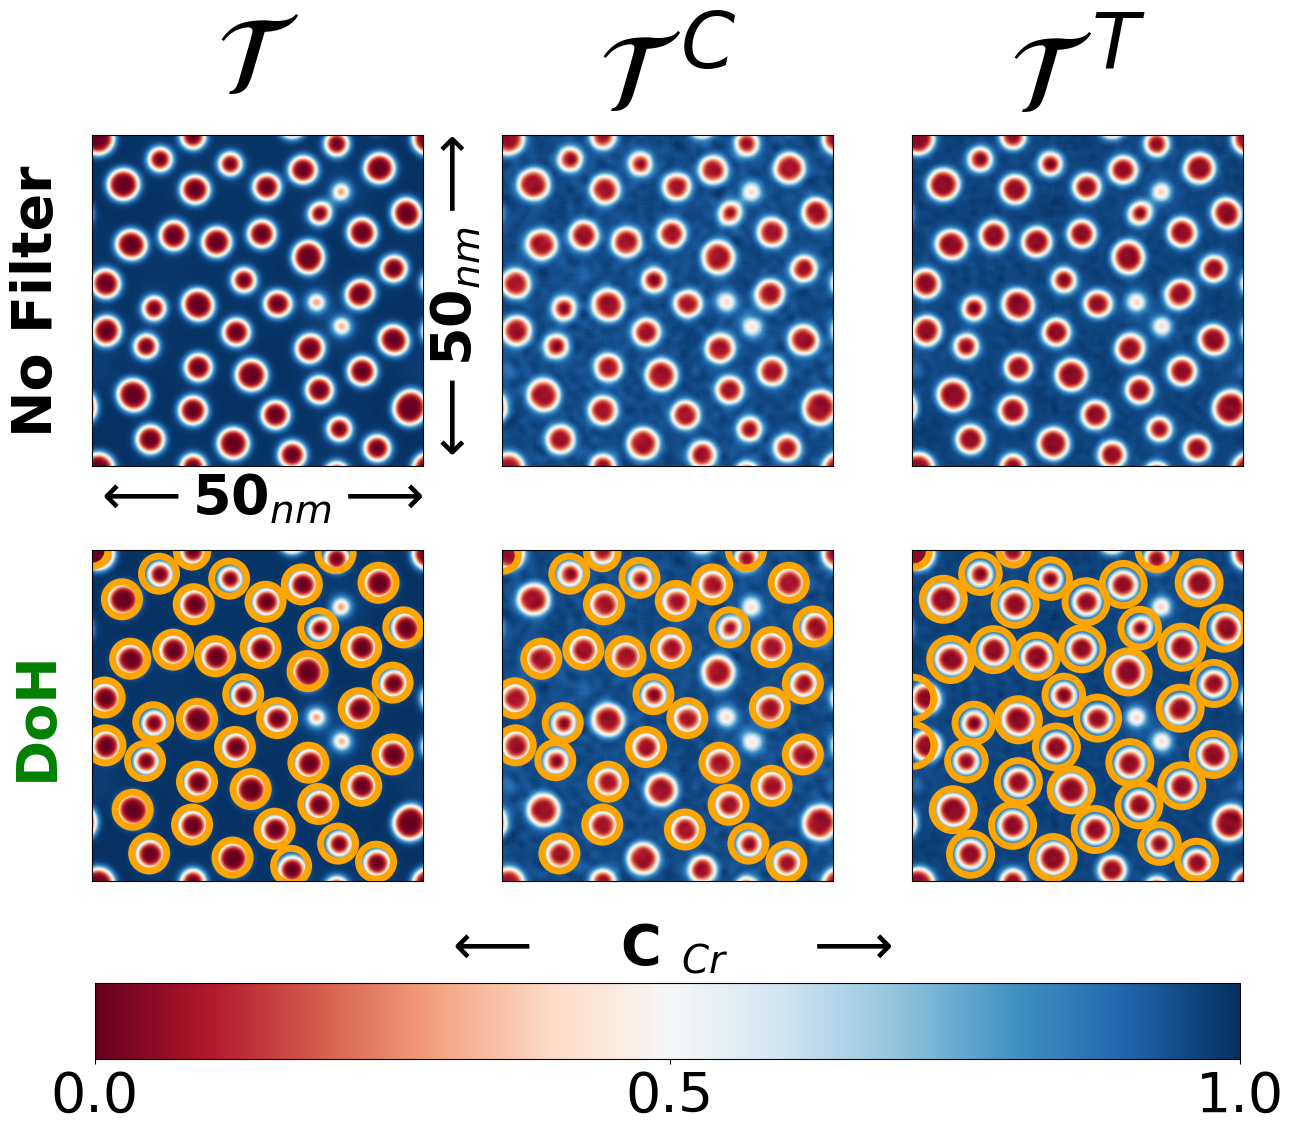

In [9]:
from skimage.feature import blob_doh, blob_doh, blob_doh
f = 55  ## Frame 

img_gt = ot_scaled[:,:,f]
img_pd_cpd = cp1_scaled[:,:,f]
img_pd_tt = tt1_scaled[:,:,f]


doh_gt = blob_doh(img_gt,  max_sigma=15, threshold=.025)
doh_pd_cpd = blob_doh(img_pd_cpd,  max_sigma=15, threshold=.025)
doh_pd_tt = blob_doh(img_pd_tt,  max_sigma=18, threshold=.025)

doh_gt[:, 2] = doh_gt[:, 2] * sqrt(2)  
doh_pd_cpd[:, 2] = doh_pd_cpd[:, 2] * sqrt(2)
doh_pd_tt[:, 2] = doh_pd_tt[:, 2] * sqrt(2)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=[15, 12.0], gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [0.65, 1]})
Algo = ["DoH", "DoH", "DoH"]

hmap1 = ax1.imshow(img_gt, cmap='RdBu')
hmap2 = ax2.imshow(img_pd_cpd, cmap='RdBu')
hmap3 = ax3.imshow(img_pd_tt, cmap='RdBu')
hmap4 = ax4.imshow(img_gt, cmap='RdBu')
hmap5 = ax5.imshow(img_pd_cpd, cmap='RdBu')
hmap6 = ax6.imshow(img_pd_tt, cmap='RdBu')

cbar = fig.colorbar(hmap4, ax=[ax4, ax5, ax6], orientation='horizontal', aspect=15, pad=0.2)
cbar.set_ticks([0, 128, 255],labels=['0.0', '0.5', '1.0']) 
cbar.ax.tick_params(labelsize=40,) 
cbar.set_label('$\longleftarrow$    C $_{Cr}$    $\longrightarrow$',  labelpad=-145, fontsize=40, rotation=00, weight='bold')

ax1.set_ylabel('No Filter', fontsize=40, weight='bold', color = 'k', labelpad=20)
ax1.set_title("$\mathcal{T}$", fontsize=80, weight='bold', pad=30)
ax2.set_title("$\mathcal{T}^{\ C}$", fontsize=80, weight='bold', pad=0)
ax3.set_title("$\mathcal{T}^{\ T}$", fontsize=80, weight='bold', pad=0)
ax4.set_ylabel(Algo[0], fontsize=40, weight='bold', color = 'g', labelpad=20)


ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax5.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax6.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)


for blob in doh_gt:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='orange', linewidth=5, linestyle='-', fill=False, )
      ax4.add_patch(c)

for blob in doh_pd_cpd:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='orange', linewidth=5, linestyle='-', fill=False, )
      ax5.add_patch(c)  
  
for blob in doh_pd_tt:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='orange', linewidth=5, linestyle='-', fill=False, )
      ax6.add_patch(c)  

ax1.set_xlabel('$\longleftarrow$50$_{nm}$$\longrightarrow$', fontsize = 40, weight ='bold',)
ax1.annotate('$\longleftarrow$50$_{nm}$$\longrightarrow$', xy=(1, 0.5), xytext=(1.10, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 40, weight = 'bold',
             color='k', ha='center', va='center')

plt.savefig('figures/Blobs.png', transparent=True)

plt.show()

## Blob Detection Ratio

In [10]:
from sklearn.model_selection import train_test_split
from math import sqrt
from skimage.feature import blob_doh

In [11]:
DoH_OT, DoH_cp1, DoH_cp2, DoH_cp3,  DoH_tt1, DoH_tt2, DoH_tt3 = [], [], [], [], [], [], []

DoH_ratio_cp1, DoH_ratio_cp2, DoH_ratio_cp3, DoH_ratio_tt1, DoH_ratio_tt2, DoH_ratio_tt3 = [], [], [], [], [], [] 

for f in range(cp1.shape[2]):
  _ot = ot[:,:,f]
  _cp1 = cp1[:,:, f]
  _cp2 = cp2[:,:, f]
  _cp3 = cp3[:,:, f]
  _tt1 = tt1[:,:, f]
  _tt2 = tt2[:,:, f]
  _tt3 = tt3[:,:, f]
  
  doh_ot = blob_doh(_ot, max_sigma=30, threshold=.01)
  
  doh_cp1 = blob_doh(_cp1, max_sigma=30, threshold=.01)
  doh_cp2 = blob_doh(_cp2, max_sigma=30, threshold=.01)
  doh_cp3 = blob_doh(_cp3, max_sigma=30, threshold=.01)

  doh_tt1 = blob_doh(_tt1, max_sigma=30, threshold=.01)
  doh_tt2 = blob_doh(_tt2, max_sigma=30, threshold=.01)
  doh_tt3 = blob_doh(_tt3, max_sigma=30, threshold=.01)

  DoH_OT.append(doh_ot.shape[0])
  
  DoH_cp1.append(doh_cp1.shape[0])
  DoH_cp2.append(doh_cp2.shape[0])
  DoH_cp3.append(doh_cp3.shape[0])
  
  DoH_tt1.append(doh_tt1.shape[0])
  DoH_tt2.append(doh_tt2.shape[0])
  DoH_tt3.append(doh_tt3.shape[0])

  DoH_ratio_cp1.append(round(doh_cp1.shape[0]/doh_ot.shape[0] ,2))
  DoH_ratio_cp2.append(round(doh_cp2.shape[0]/doh_ot.shape[0] ,2))
  DoH_ratio_cp3.append(round(doh_cp3.shape[0]/doh_ot.shape[0] ,2))
  DoH_ratio_tt1.append(round(doh_tt1.shape[0]/doh_ot.shape[0] ,2))
  DoH_ratio_tt2.append(round(doh_tt2.shape[0]/doh_ot.shape[0] ,2))
  DoH_ratio_tt3.append(round(doh_tt3.shape[0]/doh_ot.shape[0] ,2))
    

mean_cp1, std_cp1, var_cp1 = np.mean(DoH_ratio_cp1), np.std(DoH_ratio_cp1), np.var(DoH_ratio_cp1)
mean_cp2, std_cp2, var_cp2 = np.mean(DoH_ratio_cp2), np.std(DoH_ratio_cp2), np.var(DoH_ratio_cp2)
mean_cp3, std_cp3, var_cp3 = np.mean(DoH_ratio_cp3), np.std(DoH_ratio_cp3), np.var(DoH_ratio_cp3)

mean_tt1, std_tt1, var_tt1 = np.mean(DoH_ratio_tt1), np.std(DoH_ratio_tt1), np.var(DoH_ratio_tt1)
mean_tt2, std_tt2, var_tt2 = np.mean(DoH_ratio_tt2), np.std(DoH_ratio_tt2), np.var(DoH_ratio_tt2)
mean_tt3, std_tt3, var_tt3 = np.mean(DoH_ratio_tt3), np.std(DoH_ratio_tt3), np.var(DoH_ratio_tt3)


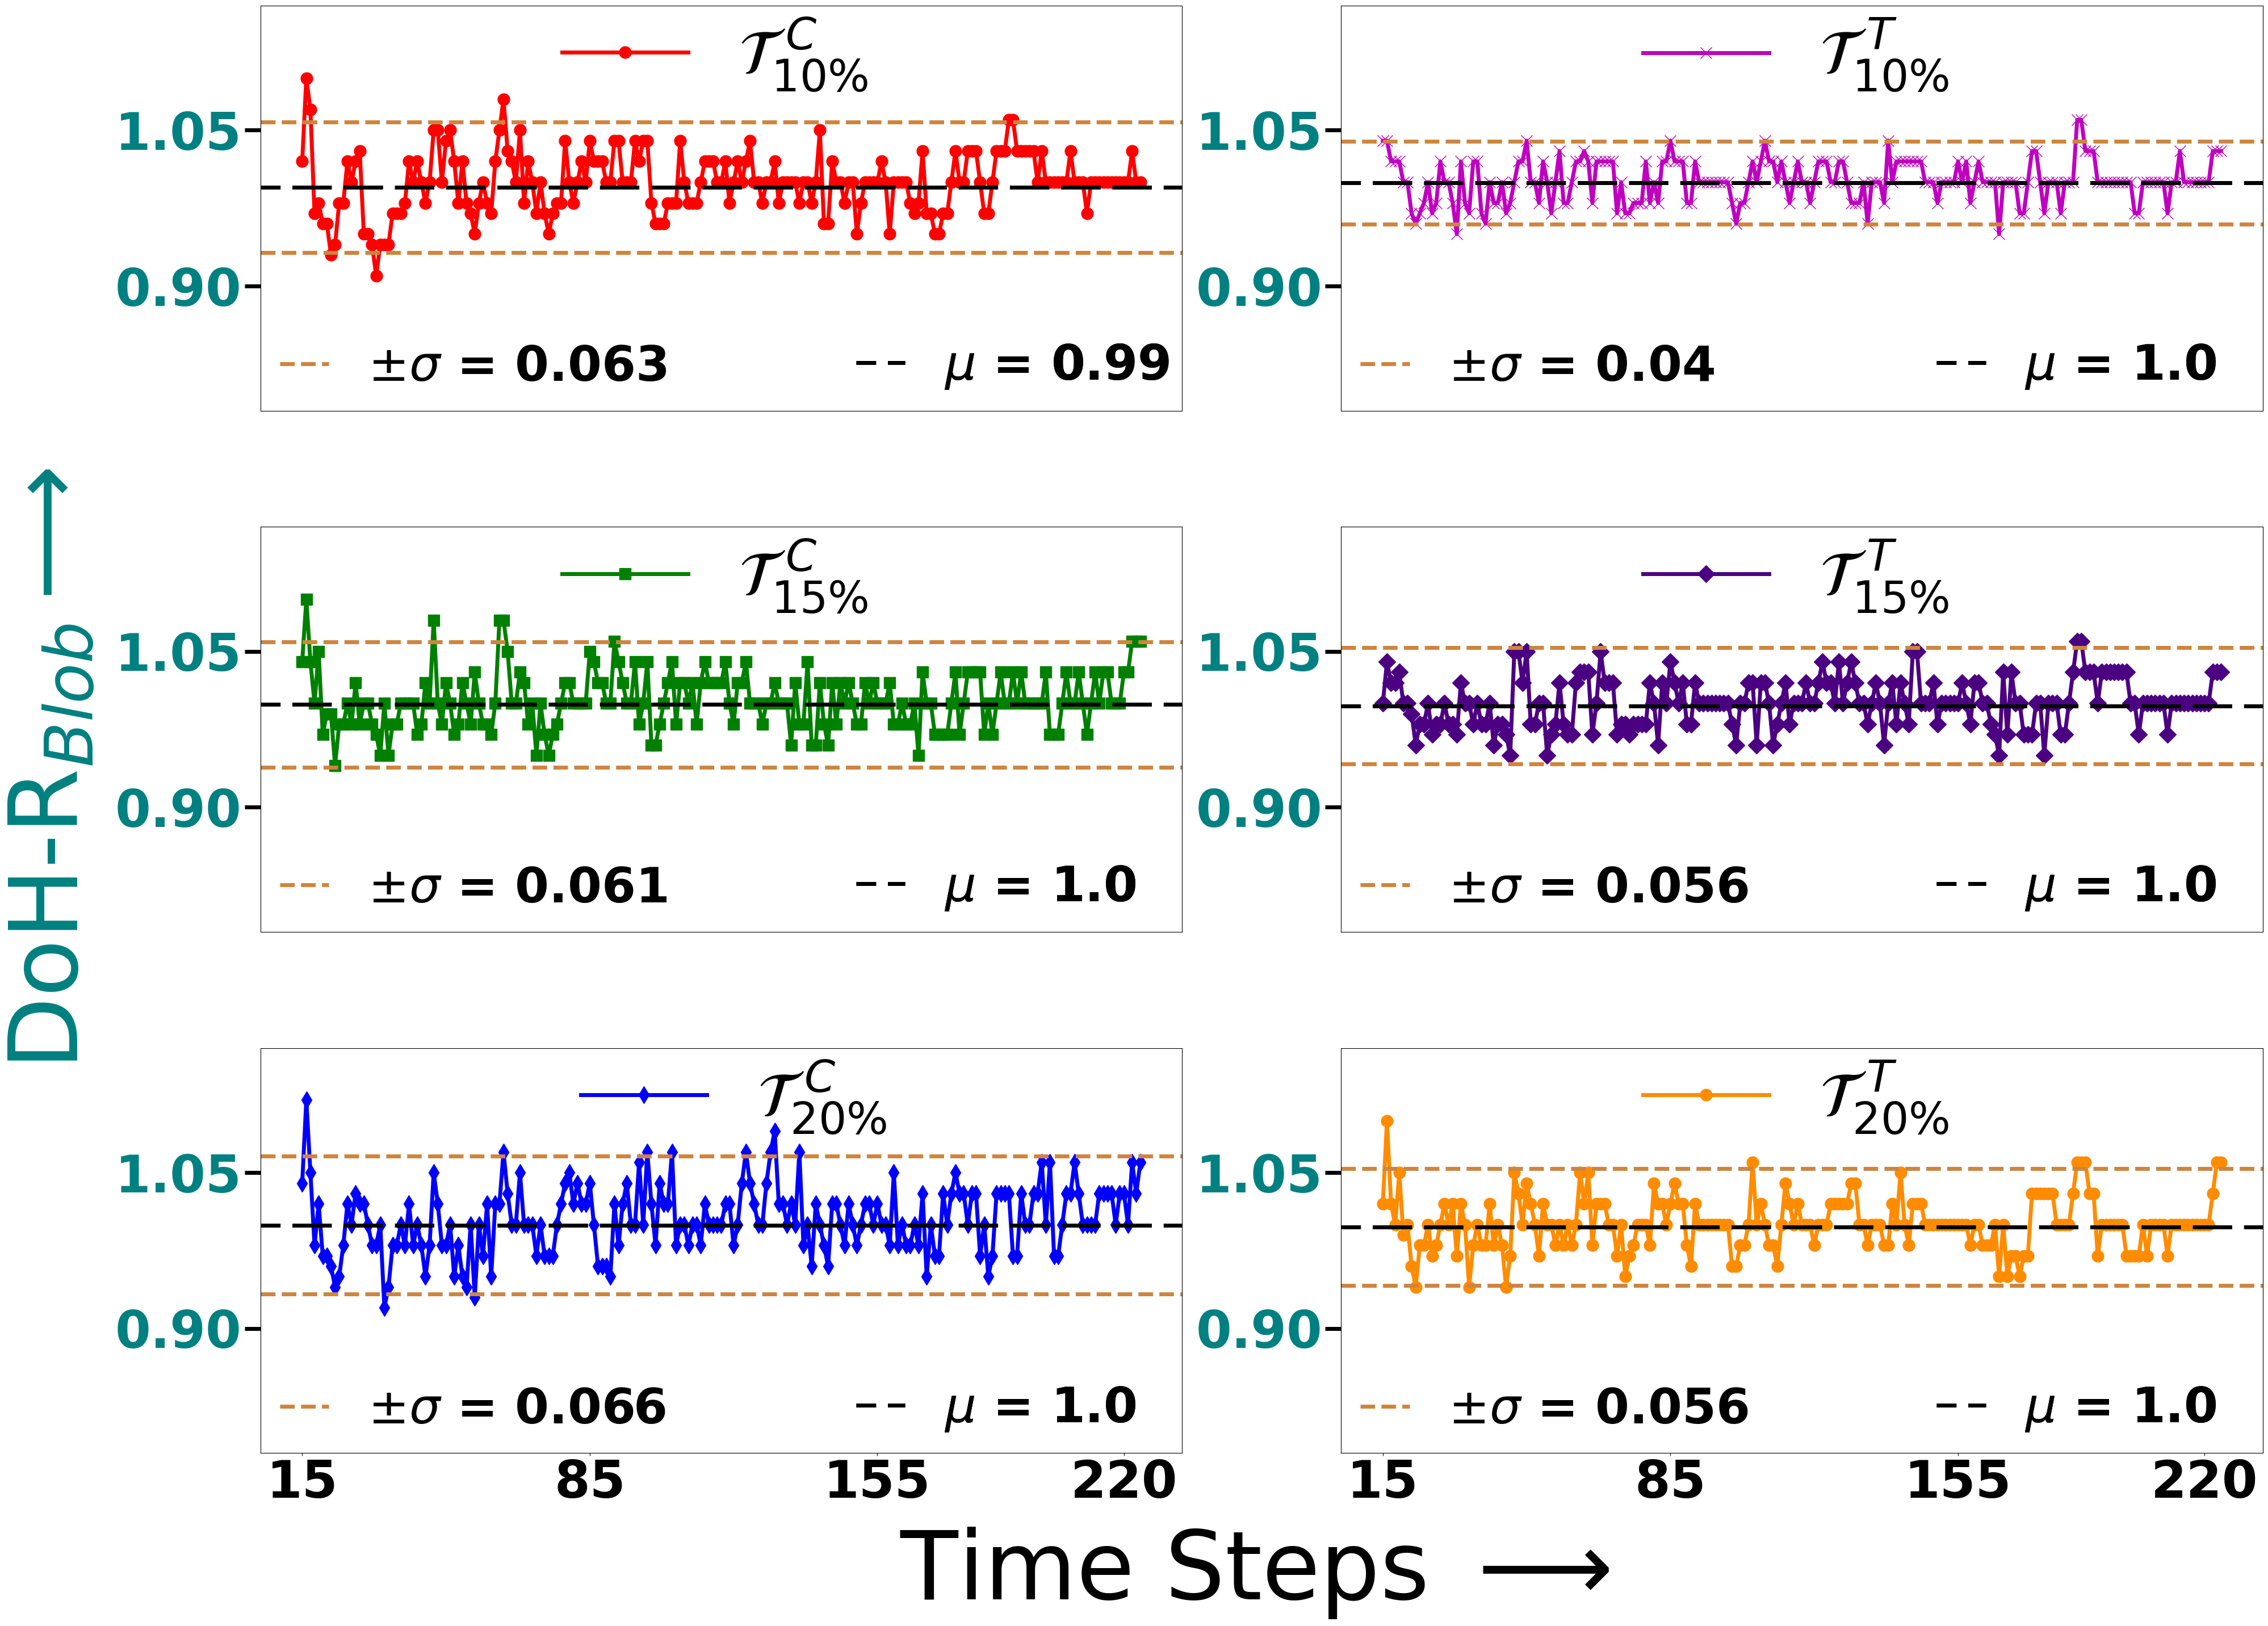

In [12]:
plt.rcParams["figure.figsize"] = (40,30)

t = 15

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, )
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=95)

fig.supxlabel(x=0.55, y =-0.0, t= r"Time Steps $\longrightarrow$", color='black',  fontsize=120)
fig.supylabel(x=-0.0, y =0.5, t=r'DoH-R$_{Blob} \longrightarrow$', color='teal', size=120)

x1 = range(len(DoH_ratio_cp1[t:]))

# ax1.text(-55,1.15,"(a)", fontsize=120, weight = 'bold', color = 'k')

l1, = ax1.plot(x1, DoH_ratio_cp1[t:], '-o', color='red', linewidth=5, markersize=15, label='$\mathcal{T}_{10\%} ^{\ C}$')
m1 = ax1.axhline(mean_cp1, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_cp1,2)}', linewidth=5)
s1 = ax1.axhline(mean_cp1+std_cp1, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_cp1,3)}', linewidth=5)
ax1.axhline(mean_cp1-std_cp1, color='peru', linestyle='--', linewidth=5)

lines_1   = ax1.get_lines()
legend1_1 = ax1.legend([lines_1[0]], [lines_1[0].get_label()], loc=(0.3, 0.72), prop={'weight':'bold', 'size':'80',},  frameon=False)
legend1_2 = ax1.legend([lines_1[1]], [lines_1[1].get_label()], loc=(0.625,-0.00), prop={'weight':'bold', 'size':'62',}, handlelength=1.0, frameon=False)
legend1_3 = ax1.legend([lines_1[2]], [lines_1[2].get_label()], loc=(0.0,-0.00), prop={'weight':'bold', 'size':'62',}, handlelength=1.0,  frameon=False)
ax1.add_artist(legend1_1)
ax1.add_artist(legend1_2)
ax1.add_artist(legend1_2)


ax1.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5, )
ax1.tick_params(axis='x', labelcolor='black', labelsize=65, bottom=False, top=False, labelbottom=False)
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
ax1.set_ylim([0.78, 1.17])

###################################################
x2 = range(len(DoH_ratio_tt1[t:]))
# ax2.text(-45,1.15,"(b)", fontsize=120, weight = 'bold', color = 'k')

l2, = ax2.plot(x2, DoH_ratio_tt1[t:], '-x', markersize=15, color='m', linewidth=5, label='$\mathcal{T}_{10\%} ^{\ T}$')
m2 = ax2.axhline(mean_tt1, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_tt1,2)}', linewidth=5)
s2 = ax2.axhline(mean_tt1+std_tt1, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_tt1,3)}', linewidth=5)
ax2.axhline(mean_tt1-std_tt1, color='peru', linestyle='--', linewidth=5)

lines_2   = ax2.get_lines()
legend2_1 = ax2.legend([lines_2[0]], [lines_2[0].get_label()], loc=(0.3, 0.72), prop={'weight':'bold', 'size':'80',},   frameon=False)
legend2_2 = ax2.legend([lines_2[1]], [lines_2[1].get_label()], loc=(0.625,-0.00), prop={'weight':'bold', 'size':'62',}, handlelength=1.0, frameon=False)
legend2_3 = ax2.legend([lines_2[2]], [lines_2[2].get_label()], loc=(0.0,-0.00), prop={'weight':'bold', 'size':'62',}, handlelength=1.0,  frameon=False)
ax2.add_artist(legend2_1)
ax2.add_artist(legend2_2)
ax2.add_artist(legend2_2)

ax2.set_ylim([0.78, 1.17])
ax2.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5)
ax2.tick_params(axis='x', labelcolor='black', labelsize=65, bottom=False, top=False, labelbottom=False)
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.set_xticks([0,65,135,200])

###################################################
x3 = range(len(DoH_ratio_cp2[t:]))

# ax3.text(-45,1.15,"(c)", fontsize=120, weight = 'bold', color = 'k')

l3, = ax3.plot(x3, DoH_ratio_cp2[t:], '-s', color='green', markersize=15, linewidth=5, label='$\mathcal{T}_{15\%} ^{\ C}$')
m3 = ax3.axhline(mean_cp2, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_cp2,2)}', linewidth=5)
s3 = ax3.axhline(mean_cp2+std_cp2, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_cp2,3)}', linewidth=5)
ax3.axhline(mean_cp2-std_cp2, color='peru', linestyle='--', linewidth=5)

lines_3   = ax3.get_lines()
legend3_1 = ax3.legend([lines_3[0]], [lines_3[0].get_label()], loc=(0.3, 0.72), prop={'weight':'bold', 'size':'80',},  frameon=False)
legend3_2 = ax3.legend([lines_3[1]], [lines_3[1].get_label()], loc=(0.625,-0.00), prop={'weight':'bold', 'size':'62',}, handlelength=1.0, frameon=False)
legend3_3 = ax3.legend([lines_3[2]], [lines_3[2].get_label()], loc=(0.0,-0.00), prop={'weight':'bold', 'size':'62',}, handlelength=1.0,  frameon=False)
ax3.add_artist(legend3_1)
ax3.add_artist(legend3_2)
ax3.add_artist(legend3_2)

ax3.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5,)
ax3.tick_params(axis='x', labelcolor='black', labelsize=65, bottom=False, top=False, labelbottom=False)
ax3.xaxis.set_major_locator(plt.MaxNLocator(4))
ax3.yaxis.set_major_locator(plt.MaxNLocator(3))
ax3.set_ylim([0.78, 1.17])

###################################################
x4 = range(len(DoH_ratio_tt2[t:]))
# ax4.text(-45,1.15,"(d)", fontsize=120, weight = 'bold', color = 'k')

l4, = ax4.plot(x4, DoH_ratio_tt2[t:], '-D', markersize=15, color='indigo', linewidth=5, label='$\mathcal{T}_{15\%} ^{\ T}$')
m4 = ax4.axhline(mean_tt2, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_tt2,2)}', linewidth=5)
s4 = ax4.axhline(mean_tt2+std_tt2, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_tt2,3)}', linewidth=5)
ax4.axhline(mean_tt2-std_tt2, color='peru', linestyle='--', linewidth=5)

lines_4   = ax4.get_lines()
legend4_1 = ax4.legend([lines_4[0]], [lines_4[0].get_label()], loc=(0.3, 0.72), prop={'weight':'bold', 'size':'80',},   frameon=False)
legend4_2 = ax4.legend([lines_4[1]], [lines_4[1].get_label()], loc=(0.625,-0.00), prop={'weight':'bold', 'size':'62',}, handlelength=1.0, frameon=False)
legend4_3 = ax4.legend([lines_4[2]], [lines_4[2].get_label()], loc=(0.0,-0.00), prop={'weight':'bold', 'size':'62',}, handlelength=1.0,  frameon=False)
ax4.add_artist(legend4_1)
ax4.add_artist(legend4_2)
ax4.add_artist(legend4_2)

ax4.set_ylim([0.78, 1.17])
ax4.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5)
ax4.tick_params(axis='x', labelcolor='black', labelsize=65, bottom=False, top=False, labelbottom=False)
ax4.xaxis.set_major_locator(plt.MaxNLocator(4))
ax4.yaxis.set_major_locator(plt.MaxNLocator(3))
ax4.set_xticks([0,65,135,200])


###################################################
x5 = range(len(DoH_ratio_cp3[t:]))
# ax5.text(-45,1.15,"(e)", fontsize=120, weight = 'bold', color = 'k')

l5, = ax5.plot(x5, DoH_ratio_cp3[t:], '-d', markersize=15, color='blue', linewidth=5, label='$\mathcal{T}_{20\%} ^{\ C}$',)
m5= ax5.axhline(mean_cp3, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_cp3,2)}', linewidth=5)
s5= ax5.axhline(mean_cp3+std_cp3, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_cp3,3)}', linewidth=5)
ax5.axhline(mean_cp3-std_cp3, color='peru', linestyle='--', linewidth=5)

lines_5   = ax5.get_lines()
legend5_1 = ax5.legend([lines_5[0]], [lines_5[0].get_label()], loc=(0.32, 0.72), prop={'weight':'bold', 'size':'80',},  frameon=False)
legend5_2 = ax5.legend([lines_5[1]], [lines_5[1].get_label()], loc=(0.625,-0.00), prop={'weight':'bold', 'size':'62',}, handlelength=1.0, frameon=False)
legend5_3 = ax5.legend([lines_5[2]], [lines_5[2].get_label()], loc=(0.0,-0.00), prop={'weight':'bold', 'size':'62',},  handlelength=1.0, frameon=False)
ax5.add_artist(legend5_1)
ax5.add_artist(legend5_2)
ax5.add_artist(legend5_2)


ax5.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5)
ax5.tick_params(axis='x', labelcolor='black', labelsize=65)
# ax5.xaxis.set_major_locator(plt.MaxNLocator(4))
ax5.set_xticks([0, 70, 140, 200], labels=[15, 85, 155, 220])
ax5.yaxis.set_major_locator(plt.MaxNLocator(3))
ax5.set_ylim([0.78, 1.17])

###################################################
x6 = range(len(DoH_ratio_tt3[t:]))
# ax6.text(-40,1.15,"(f)", fontsize=120, weight = 'bold', color = 'k')

l6, = ax6.plot(x6, DoH_ratio_tt3[t:], '-o', markersize=15, color='darkorange', linewidth=5, label='$\mathcal{T}_{20\%} ^{\ T}$')
m6 = ax6.axhline(mean_tt3, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_tt3,2)}', linewidth=5)
s6 = ax6.axhline(mean_tt3+std_tt3, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_tt3,3)}', linewidth=5)
ax6.axhline(mean_tt3-std_tt3, color='peru', linestyle='--', linewidth=5)

lines_6   = ax6.get_lines()
legend6_1 = ax6.legend([lines_6[0]], [lines_6[0].get_label()], loc=(0.3, 0.72), prop={'weight':'bold', 'size':'80',},   frameon=False)
legend6_2 = ax6.legend([lines_6[1]], [lines_6[1].get_label()], loc=(0.625,-0.00), prop={'weight':'bold', 'size':'62',}, handlelength=1.0, frameon=False)
legend6_3 = ax6.legend([lines_6[2]], [lines_6[2].get_label()], loc=(0.0,-0.00), prop={'weight':'bold', 'size':'62',}, handlelength=1.0,  frameon=False)
ax6.add_artist(legend6_1)
ax6.add_artist(legend6_2)
ax6.add_artist(legend6_2)

ax6.set_ylim([0.78, 1.17])
ax6.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5)
ax6.tick_params(axis='x', labelcolor='black', labelsize=65)
ax6.set_xticks([0, 70, 140, 200], labels=[15, 85, 155, 220])
ax6.yaxis.set_major_locator(plt.MaxNLocator(3))

###################################################

for label in ax1.get_yticklabels(): label.set_fontweight('bold')
for label in ax2.get_yticklabels(): label.set_fontweight('bold')
for label in ax3.get_yticklabels(): label.set_fontweight('bold')  
for label in ax4.get_yticklabels(): label.set_fontweight('bold')  
for label in ax5.get_yticklabels(): label.set_fontweight('bold')  
for label in ax6.get_yticklabels(): label.set_fontweight('bold')  
for label in ax4.get_xticklabels(): label.set_fontweight('bold')  
for label in ax5.get_xticklabels(): label.set_fontweight('bold')  
for label in ax6.get_xticklabels(): label.set_fontweight('bold')  

plt.tight_layout()

plt.savefig('figures/blobs_ratio.png', transparent=True)

plt.show()

## Shape Index

In [13]:
from scipy import ndimage as ndi
from skimage.feature import shape_index
from skimage.draw import disk
import matplotlib.patheffects as path_effects

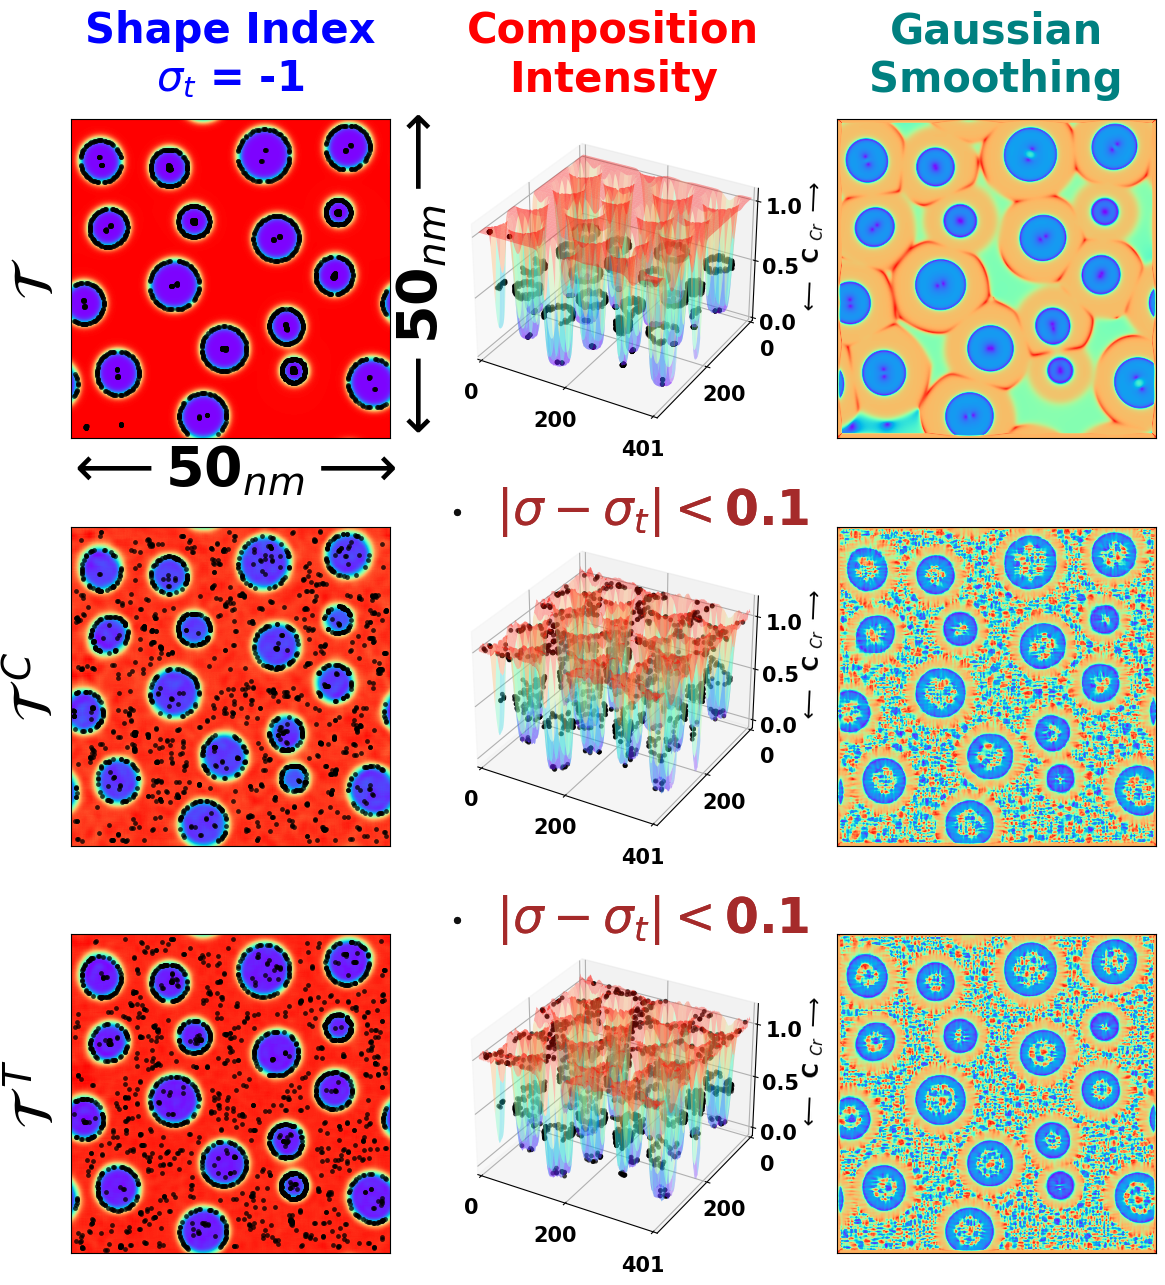

In [14]:
f = 219

pd_img_cpd = cp1[:,:, f]
pd_img_tt = tt1[:,:, f]
gt_img = ot[:,:, f]

s = shape_index(gt_img)

target = -1
delta = 0.1
col = 'black'

point_y, point_x = np.where(np.abs(s - target) < delta)
point_z = gt_img[point_y, point_x]
s_smooth = ndi.gaussian_filter(s, sigma=0.5)
point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = gt_img[point_y_s, point_x_s]


fig = plt.figure(figsize=(14, 15))

ax1 = fig.add_subplot(3, 3, 1)

ax1.imshow(gt_img, cmap=plt.cm.rainbow)
ax1.set_title(f'Shape Index\n$\sigma _t$ = {target}', color="Blue", fontsize=30, weight='bold', pad=20)
ax1.set_ylabel('$\mathcal{T}$', fontsize=40, weight='bold')
scatter_settings = dict(alpha=0.75, s=12, linewidths=0)
ax1.scatter(point_x, point_y, color=col, **scatter_settings)
ax1.scatter(point_x_s, point_y_s, color=col, **scatter_settings)

ax2 = fig.add_subplot(3, 3, 2, projection='3d', sharex=ax1, sharey=ax1)
x, y = np.meshgrid(np.arange(0, gt_img.shape[0], 1), np.arange(0, gt_img.shape[1], 1))
ax2.plot_surface(x, y, gt_img, linewidth=0, alpha=0.35, cmap=plt.cm.rainbow) # color="teal")
sp2_0 = ax2.scatter(point_x, point_y, point_z, color=col, label=r'$|s - 1|<$%s'%delta, **scatter_settings)
sp2_1 =ax2.scatter(point_x_s, point_y_s, point_z_s, color=col, label='$|s\' - 1|<$%s'%delta, **scatter_settings)

ax2.set_title('Composition\nIntensity', color='red', fontsize=30, weight='bold', pad=20)

ax3 = fig.add_subplot(3, 3, 3, sharex=ax1, sharey=ax1)
ax3.imshow(s, cmap=plt.cm.rainbow)
ax3.set_title('Gaussian\nSmoothing', color='teal', fontsize=30, weight='bold', pad=20)

#############################################################

s = shape_index(pd_img_cpd)

point_y, point_x = np.where(np.abs(s - target) < delta)
point_z = pd_img_cpd[point_y, point_x]

s_smooth = ndi.gaussian_filter(s, sigma=0.5)

point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = pd_img_cpd[point_y_s, point_x_s]

ax4 = fig.add_subplot(3, 3, 4)

# ax4.imshow(pd_img_cpd, cmap=plt.cm.gray)
ax4.imshow(pd_img_cpd, cmap=plt.cm.rainbow)
ax4.set_ylabel('$\mathcal{T}^{\ C}$', fontsize=40, weight='bold')
scatter_settings = dict(alpha=0.75, s=12, linewidths=0)
ax4.scatter(point_x, point_y, color=col, **scatter_settings)
ax4.scatter(point_x_s, point_y_s, color=col, **scatter_settings)

ax5 = fig.add_subplot(3, 3, 5, projection='3d', sharex=ax1, sharey=ax1)
x, y = np.meshgrid(np.arange(0, pd_img_cpd.shape[0], 1), np.arange(0, pd_img_cpd.shape[1], 1))
ax5.plot_surface(x, y, pd_img_cpd, linewidth=0, alpha=0.35,  cmap=plt.cm.rainbow)#color="hotpink")
sp5_0 = ax5.scatter(point_x, point_y, point_z, color=col, label=r'$|s - 1|<$%s'%delta, **scatter_settings)
sp5_1 = ax5.scatter(point_x_s, point_y_s, point_z_s, color=col, label='$|s\' - 1|<$%s'%delta, **scatter_settings)

legend5_1 = ax5.legend(loc=(-0.05,0.90), prop={'weight':'bold', 'size':'35'}, markerscale=1.5, handlelength=0, handles=[sp5_0], labels=[r'$|\sigma - \sigma _t|<$%s'%( delta)],  labelcolor='brown', frameon=False)
ax5.add_artist(legend5_1)

ax6 = fig.add_subplot(3, 3, 6, sharex=ax1, sharey=ax1)
ax6.imshow(s, cmap=plt.cm.rainbow,)

ax2.set_zlabel('$\longleftarrow$  C $_{Cr}$ $\longrightarrow$', fontsize = 15, labelpad=5, weight ='bold')

ax5.set_zlabel('$\longleftarrow$  C $_{Cr}$ $\longrightarrow$', fontsize = 15, labelpad=5, weight ='bold')

ax1.set_xlabel('$\longleftarrow$50$_{nm}$$\longrightarrow$', fontsize = 40, weight ='bold',)

ax1.annotate('$\longleftarrow$50$_{nm}$$\longrightarrow$', xy=(1, 0.5), xytext=(1.10, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 40, weight = 'bold',
             color='k', ha='center', va='center')

###############################################################

s = shape_index(pd_img_tt)

point_y, point_x = np.where(np.abs(s - target) < delta)
point_z = pd_img_tt[point_y, point_x]

s_smooth = ndi.gaussian_filter(s, sigma=0.5)

point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = pd_img_tt[point_y_s, point_x_s]

ax7 = fig.add_subplot(3, 3, 7)

ax7.imshow(pd_img_tt, cmap=plt.cm.rainbow)
ax7.set_ylabel('$\mathcal{T}^{\ T}$', fontsize=40, weight='bold')
scatter_settings = dict(alpha=0.75, s=12, linewidths=0)
ax7.scatter(point_x, point_y, color=col, **scatter_settings)
ax7.scatter(point_x_s, point_y_s, color=col, **scatter_settings)

ax8 = fig.add_subplot(3, 3, 8, projection='3d', sharex=ax1, sharey=ax1)
x, y = np.meshgrid(np.arange(0, pd_img_cpd.shape[0], 1), np.arange(0, pd_img_cpd.shape[1], 1))
ax8.plot_surface(x, y, pd_img_cpd, linewidth=0, alpha=0.35,  cmap=plt.cm.rainbow)#color="hotpink")
sp8_0 = ax8.scatter(point_x, point_y, point_z, color=col, label=r'$|s - 1|<$%s'%delta, **scatter_settings)
sp8_1 = ax8.scatter(point_x_s, point_y_s, point_z_s, color=col, label='$|s\' - 1|<$%s'%delta, **scatter_settings)

legend8_1 = ax8.legend(loc=(-0.05,0.90), prop={'weight':'bold', 'size':'35'}, markerscale=1.5, handlelength=0, handles=[sp8_0], labels=[r'$|\sigma - \sigma _t|<$%s'%( delta)],  labelcolor='brown', frameon=False)
ax8.add_artist(legend8_1)

ax9 = fig.add_subplot(3, 3, 9, sharex=ax1, sharey=ax1)
ax9.imshow(s, cmap=plt.cm.rainbow,)
ax8.set_zlabel('$\longleftarrow$  C $_{Cr}$ $\longrightarrow$', fontsize = 15, labelpad=5, weight ='bold')


ax2.xaxis.set_ticks([0, 200, 400],labels=['0', '200', '401']) 
ax2.yaxis.set_ticks([0, 200],labels=['0', '200']) 
ax2.zaxis.set_ticks([0, 0.5, 1],labels=['0.0', '0.5', '1.0']) 
ax5.xaxis.set_ticks([0, 200, 400],labels=['0', '200', '401']) 
ax5.yaxis.set_ticks([0, 200],labels=['0', '200', ]) 
ax5.zaxis.set_ticks([0, 0.5, 1],labels=['0.0', '0.5', '1.0']) 
ax8.xaxis.set_ticks([0, 200, 400],labels=['0', '200', '401']) 
ax8.yaxis.set_ticks([0, 200],labels=['0', '200', ]) 
ax8.zaxis.set_ticks([0, 0.5, 1],labels=['0.0', '0.5', '1.0']) 

for label in ax2.get_xticklabels(): label.set_fontweight('bold')
for label in ax2.get_yticklabels(): label.set_fontweight('bold')
for label in ax2.get_zticklabels(): label.set_fontweight('bold')
for label in ax5.get_xticklabels(): label.set_fontweight('bold')
for label in ax5.get_yticklabels(): label.set_fontweight('bold')
for label in ax5.get_zticklabels(): label.set_fontweight('bold') 
for label in ax8.get_xticklabels(): label.set_fontweight('bold')
for label in ax8.get_yticklabels(): label.set_fontweight('bold')
for label in ax8.get_zticklabels(): label.set_fontweight('bold') 

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax2.tick_params(axis='both', labelcolor='black', labelsize=15, bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax5.tick_params(axis='both', labelcolor='black', labelsize=15, bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax6.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax7.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax8.tick_params(axis='both', labelcolor='black', labelsize=15, bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax9.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# fig.tight_layout()
plt.savefig('figures/SI.png', transparent=True)

plt.show()

# $\mu _{SIM}$

In [15]:
def scale_array(arr):
  scaled_arry = []
  for f in range(arr.shape[-1]):
    arr_min = np.min(arr[:,:,f])
    arr_max = np.max(arr[:,:,f])
    scaled_arry.append(((arr[:,:,f] - arr_min) / (arr_max - arr_min) * 255).astype(np.uint8))
  scaled_arry = np.array(scaled_arry).transpose(1,2,0)
  return scaled_arry

ot_scaled = scale_array(ot)
cp1_scaled = scale_array(cp1)
cp2_scaled = scale_array(cp2)
cp3_scaled = scale_array(cp3)
tt1_scaled = scale_array(tt1)
tt2_scaled = scale_array(tt2)
tt3_scaled = scale_array(tt3)

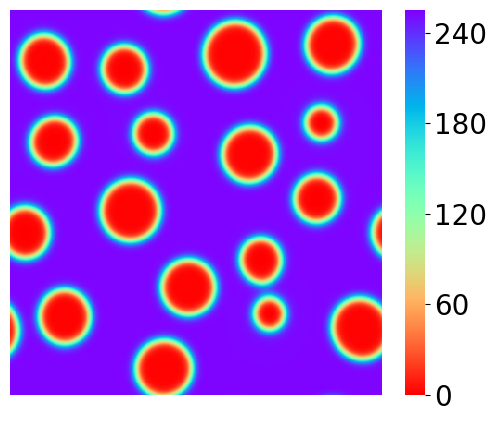

In [16]:
fig = plt.figure(figsize = (6, 5))
# i = 1
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(ot_scaled[:, :, -1], cmap = 'rainbow_r', vmin = 0, vmax = 255)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20,) 
cbar.locator = plt.MaxNLocator(nbins=5,)  # Adjust the number of ticks here
cbar.update_ticks()
# plt.title(f'Ground truth data (t = {i+1})', weight = 'bold')
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
x_dim, y_dim, t_dim = ot_scaled.shape[0], ot_scaled.shape[1], ot_scaled.shape[2]

mse_cp1, rmse_cp1, psnr_cp1, msim_cp1  = [np.zeros((t_dim)) for _ in range(4)]
mse_cp2, rmse_cp2, psnr_cp2, msim_cp2  = [np.zeros((t_dim)) for _ in range(4)]
mse_cp3, rmse_cp3, psnr_cp3, msim_cp3  = [np.zeros((t_dim)) for _ in range(4)]
mse_tt1, rmse_tt1, psnr_tt1, msim_tt1  = [np.zeros((t_dim)) for _ in range(4)]
mse_tt2, rmse_tt2, psnr_tt2, msim_tt2  = [np.zeros((t_dim)) for _ in range(4)]
mse_tt3, rmse_tt3, psnr_tt3, msim_tt3  = [np.zeros((t_dim)) for _ in range(4)]

for f in range(t_dim):
  mse_cp1[f] =  metrics.mean_squared_error(ot[:,:,f], cp1[:,:,f])
  rmse_cp1[f] = metrics.normalized_root_mse(ot[:,:,f], cp1[:,:,f])
  psnr_cp1[f] = metrics.peak_signal_noise_ratio(ot_scaled[:,:,f], cp1_scaled[:,:,f], data_range=None)
  msim_cp1[f] = metrics.structural_similarity(ot_scaled[:,:,f], cp1_scaled[:,:,f], win_size=3)

  mse_cp2[f] =  metrics.mean_squared_error(ot[:,:,f], cp2[:,:,f])
  rmse_cp2[f] = metrics.normalized_root_mse(ot[:,:,f], cp2[:,:,f])
  psnr_cp2[f] = metrics.peak_signal_noise_ratio(ot_scaled[:,:,f], cp2_scaled[:,:,f], data_range=None)
  msim_cp2[f] = metrics.structural_similarity(ot_scaled[:,:,f], cp2_scaled[:,:,f], win_size=3)

  mse_cp3[f] =  metrics.mean_squared_error(ot[:,:,f], cp3[:,:,f])
  rmse_cp3[f] = metrics.normalized_root_mse(ot[:,:,f], cp3[:,:,f])
  psnr_cp3[f] = metrics.peak_signal_noise_ratio(ot_scaled[:,:,f], cp3_scaled[:,:,f], data_range=None)
  msim_cp3[f] = metrics.structural_similarity(ot_scaled[:,:,f], cp3_scaled[:,:,f], win_size=3)

  mse_tt1[f] =  metrics.mean_squared_error(ot[:,:,f], tt1[:,:,f])
  rmse_tt1[f] = metrics.normalized_root_mse(ot[:,:,f], tt1[:,:,f])
  psnr_tt1[f] = metrics.peak_signal_noise_ratio(ot_scaled[:,:,f], tt1_scaled[:,:,f], data_range=None)
  msim_tt1[f] = metrics.structural_similarity(ot_scaled[:,:,f], tt1_scaled[:,:,f], win_size=3)

  mse_tt2[f] =  metrics.mean_squared_error(ot[:,:,f], tt2[:,:,f])
  rmse_tt2[f] = metrics.normalized_root_mse(ot[:,:,f], tt2[:,:,f])
  psnr_tt2[f] = metrics.peak_signal_noise_ratio(ot_scaled[:,:,f], tt2_scaled[:,:,f], data_range=None)
  msim_tt2[f] = metrics.structural_similarity(ot_scaled[:,:,f], tt2_scaled[:,:,f], win_size=3)

  mse_tt3[f] =  metrics.mean_squared_error(ot[:,:,f], tt3[:,:,f])
  rmse_tt3[f] = metrics.normalized_root_mse(ot[:,:,f], tt3[:,:,f])
  psnr_tt3[f] = metrics.peak_signal_noise_ratio(ot_scaled[:,:,f], tt3_scaled[:,:,f], data_range=None)
  msim_tt3[f] = metrics.structural_similarity(ot_scaled[:,:,f], tt3_scaled[:,:,f], win_size=3)

mse_cp1_all = metrics.mean_squared_error(ot, cp1)
rmse_cp1_all = metrics.normalized_root_mse(ot, cp1)
psnr_cp1_all = metrics.peak_signal_noise_ratio(ot_scaled, cp1_scaled, data_range=None)
msim_cp1_all = metrics.structural_similarity(ot_scaled, cp1_scaled, win_size=3)

mse_cp2_all = metrics.mean_squared_error(ot, cp2)
rmse_cp2_all = metrics.normalized_root_mse(ot, cp2)
psnr_cp2_all = metrics.peak_signal_noise_ratio(ot_scaled, cp2_scaled, data_range=None)
msim_cp2_all = metrics.structural_similarity(ot_scaled, cp2_scaled, win_size=3)

mse_cp3_all = metrics.mean_squared_error(ot, cp3)
rmse_cp3_all = metrics.normalized_root_mse(ot, cp3)
psnr_cp3_all = metrics.peak_signal_noise_ratio(ot_scaled, cp3_scaled, data_range=None)
msim_cp3_all = metrics.structural_similarity(ot_scaled, cp3_scaled, win_size=3)

mse_tt1_all = metrics.mean_squared_error(ot, tt1)
rmse_tt1_all = metrics.normalized_root_mse(ot, tt1)
psnr_tt1_all = metrics.peak_signal_noise_ratio(ot_scaled, tt1_scaled, data_range=None)
msim_tt1_all = metrics.structural_similarity(ot_scaled, tt1_scaled, win_size=3)

mse_tt2_all = metrics.mean_squared_error(ot, tt2)
rmse_tt2_all = metrics.normalized_root_mse(ot, tt2)
psnr_tt2_all = metrics.peak_signal_noise_ratio(ot_scaled, tt2_scaled, data_range=None)
msim_tt2_all = metrics.structural_similarity(ot_scaled, tt2_scaled, win_size=3)

mse_tt3_all = metrics.mean_squared_error(ot, tt3)
rmse_tt3_all = metrics.normalized_root_mse(ot, tt3)
psnr_tt3_all = metrics.peak_signal_noise_ratio(ot_scaled, tt3_scaled, data_range=None)
msim_tt3_all = metrics.structural_similarity(ot_scaled, tt3_scaled, win_size=3)

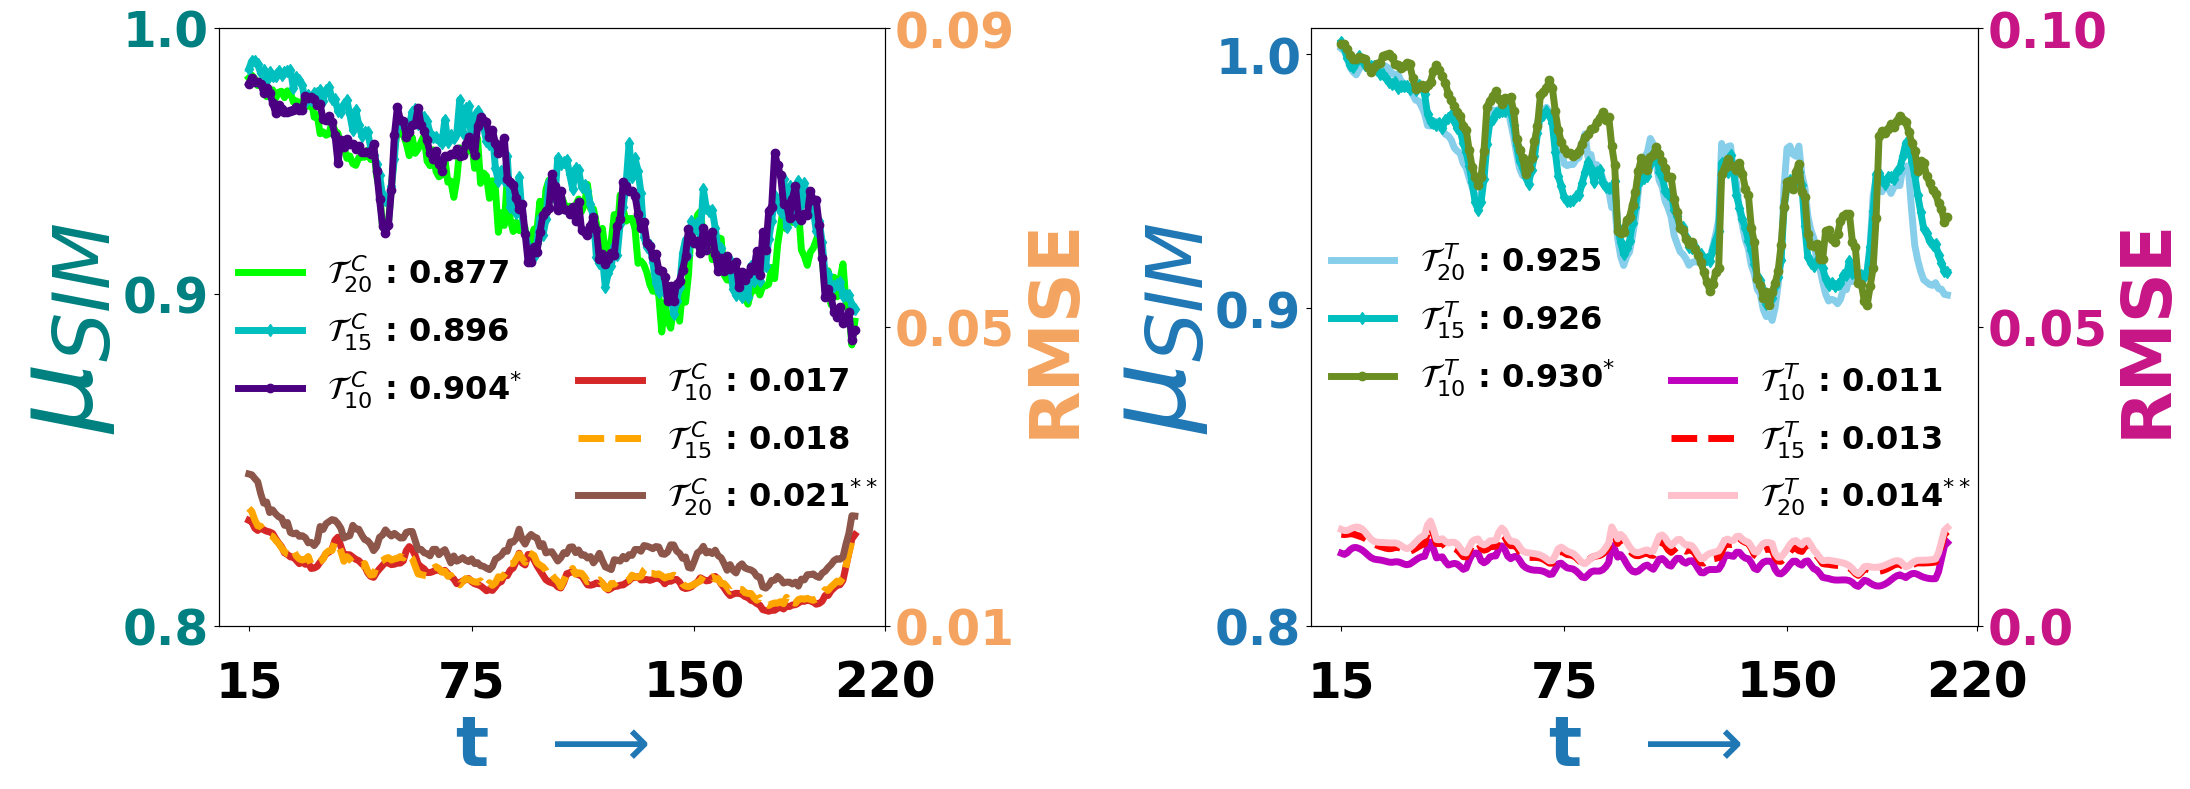

In [18]:
t = 15

plt.rcParams["figure.figsize"] = (22,8)

fig, (ax1, ax3) = plt.subplots(1, 2,)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)


# Plot array A
msim3, = ax1.plot(msim_cp3[t:], linestyle = '-', color='lime', label = r'$\mathcal{T}_{20} ^{\ C}$'f' : {msim_cp3_all*1.00:.3F}'r'$^{}$', linewidth=5)
msim2, = ax1.plot(msim_cp2[t:],  '-d', color='c', label = r'$\mathcal{T}_{15} ^{\ C}$' f' : {msim_cp2_all*1.00:.3F}'r'$^{}$', linewidth=5)
msim1, = ax1.plot(msim_cp1[t:], '-o', color='indigo', label = r'$\mathcal{T}_{10} ^{\ C}$' f' : {msim_cp1_all*1.00:.3F}'r'$^{*}$', linewidth=5)

ax1.set_xlabel(r"t  $\longrightarrow$", color="C0", size=50,  weight = 'bold')
ax1.set_ylabel("$\mu_{SIM}$", size=80, color='teal', weight = 'bold')
ax1.xaxis.set_label_position('bottom') 
ax1.yaxis.set_label_position('left') 
ax1.tick_params(axis='y', labelcolor='teal', labelsize=35)
ax1.tick_params(axis='x', labelcolor='black', labelsize=35, pad=20)
ax1.set_yticks([0.70, 0.8, 0.9, 0.98], labels=["0.7", '0.8', '0.9', '1.0'])
ax1.set_xticks([0, 75, 150, 214], labels=[15, 75, 150, 220])

ax1.set_ylim([0.80,0.98])


ax2 = ax1.twinx()

rmse1, = ax2.plot(rmse_cp1[t:], color='C3', label = r'$\mathcal{T}_{10} ^{\ C}$' f' : {rmse_cp1_all*1.00:.3F}'r'$^{}$', linewidth=5)
rmse2, = ax2.plot(rmse_cp2[t:], '--', color='orange', label = r'$\mathcal{T}_{15} ^{\ C}$' f' : {rmse_cp2_all*1.00:.3F}'r'$^{}$', linewidth=5)
rmse3, = ax2.plot(rmse_cp3[t:], color='C5', label = r'$\mathcal{T}_{20} ^{\ C}$'f' : {rmse_cp3_all*1.00:.3F}'r'$^{**}$', linewidth=5)  # rmse_cpd_3
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('iterations', color="C1") 
ax2.set_ylabel('RMSE', color="C1")       
ax2.xaxis.set_label_position('bottom') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")

ax2.set_ylabel("RMSE", size=50, color='sandybrown', weight = 'bold')
ax2.tick_params(axis='y', labelcolor='sandybrown', labelsize=35)

ax2.set_ylim([0.01,0.09])
ax2.set_yticks([0.01, 0.05, 0.09], labels=["0.01", '0.05', '0.09'])

ax1.legend(loc=(0.01,0.34), prop={'weight':'bold', 'size':'23'},  frameon=False).get_frame().set_facecolor('none')
ax2.legend(loc=(0.52, 0.16), prop={'weight':'bold', 'size':'23'}, frameon=False).get_frame().set_facecolor('none')

# plt.text(-105.5,0.09,"(a)", fontsize=65, weight = 'bold')


#########################################################
#########################################################

msim3, = ax3.plot(msim_tt3[t:], linestyle = '-', color='skyblue', label = r'$\mathcal{T}_{20} ^{\ T}$'f' : {msim_tt3_all*1.00:.3F}'r'$^{}$', linewidth=5)
msim2, = ax3.plot(msim_tt2[t:],  '-d', color='c', label = r'$\mathcal{T}_{15} ^{\ T}$' f' : {msim_tt2_all*1.00:.3F}'r'$^{}$', linewidth=5)
msim1, = ax3.plot(msim_tt1[t:], '-o', color='olivedrab', label = r'$\mathcal{T}_{10} ^{\ T}$' f' : {msim_tt1_all*1.00:.3F}'r'$^{*}$', linewidth=5)

ax3.set_xlabel(r"t  $\longrightarrow$", color="C0", size=50,  weight = 'bold')
ax3.set_ylabel("$\mu_{SIM}$", size=80, color='tab:blue', weight = 'bold')
ax3.xaxis.set_label_position('bottom') 
ax3.yaxis.set_label_position('left') 
ax3.tick_params(axis='y', labelcolor='tab:blue', labelsize=35)
ax3.tick_params(axis='x', labelcolor='black', labelsize=35, pad=20)
ax3.set_yticks([0.8, 0.9, 0.98], labels=['0.8', '0.9', '1.0'])
ax3.set_xticks([0, 75, 150, 214], labels=[15, 75, 150, 220])

# ax3.set_ylim([0.80,0.98])


ax4 = ax3.twinx()

rmse1, = ax4.plot(rmse_tt1[t:], color='m', label = r'$\mathcal{T}_{10} ^{\ T}$' f' : {rmse_tt1_all*1.00:.3F}'r'$^{}$', linewidth=5)
rmse2, = ax4.plot(rmse_tt2[t:], '--', color='r', label = r'$\mathcal{T}_{15} ^{\ T}$' f' : {rmse_tt2_all*1.00:.3F}'r'$^{}$', linewidth=5)
rmse3, = ax4.plot(rmse_tt3[t:], color='pink', label = r'$\mathcal{T}_{20} ^{\ T}$'f' : {rmse_tt3_all*1.00:.3F}'r'$^{**}$', linewidth=5)  # rmse_cpd_3
ax4.xaxis.tick_top()
ax4.yaxis.tick_right()
ax4.set_xlabel('iterations', color="C1") 
ax4.set_ylabel('RMSE', color="C1")       
ax4.xaxis.set_label_position('bottom') 
ax4.yaxis.set_label_position('right') 
ax4.tick_params(axis='x', colors="C1")

ax4.set_ylabel("RMSE", size=50, color='mediumvioletred', weight = 'bold')
ax4.tick_params(axis='y', labelcolor='mediumvioletred', labelsize=35)

ax4.set_ylim([0.00,0.09])
ax4.set_yticks([0.00, 0.05, 0.10], labels=["0.0", '0.05', '0.10'])

ax3.legend(loc=(0.01,0.36), prop={'weight':'bold', 'size':'23'},  frameon=False).get_frame().set_facecolor('none')
ax4.legend(loc=(0.52, 0.16), prop={'weight':'bold', 'size':'23'}, frameon=False).get_frame().set_facecolor('none')

for label in ax1.get_xticklabels(): label.set_fontweight('bold')
for label in ax1.get_yticklabels(): label.set_fontweight('bold')
for label in ax2.get_yticklabels(): label.set_fontweight('bold')    
for label in ax3.get_xticklabels(): label.set_fontweight('bold')
for label in ax3.get_yticklabels(): label.set_fontweight('bold')
for label in ax4.get_yticklabels(): label.set_fontweight('bold')    

# plt.text(-105.5,0.1,"(b)", fontsize=65, weight = 'bold')


plt.tight_layout()

plt.savefig('/figures/usim.png', transparent=True)
plt.show()